<a href="https://colab.research.google.com/github/RichardKameri/Machine-learning-2/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install prophet



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet


In [3]:
# import the dataset
df = pd.read_csv('/content/train_1.csv')
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
df.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145062,Francisco_el_matemático_(serie_de_televisión_d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [6]:
# understand the dataset
df.shape

(145063, 551)

In [7]:
# datatypes
df.dtypes

,0
Page,object
2015-07-01,float64
2015-07-02,float64
2015-07-03,float64
2015-07-04,float64
...,...
2016-12-27,float64
2016-12-28,float64
2016-12-29,float64
2016-12-30,float64


In [33]:
# number of columns
df.columns


Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [37]:
data = {'date': ['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print(df.info())  # Check data types


Original DataFrame:
          date
0         Page
1   2015-07-01
2   2015-07-02
3   2015-07-03
4   2015-07-04
5   2015-07-05
6   2015-07-06
7   2015-07-07
8   2015-07-08
9   2015-07-09
10  2016-12-22
11  2016-12-23
12  2016-12-24
13  2016-12-25
14  2016-12-26
15  2016-12-27
16  2016-12-28
17  2016-12-29
18  2016-12-30
19  2016-12-31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    20 non-null     object
dtypes: object(1)
memory usage: 288.0+ bytes
None


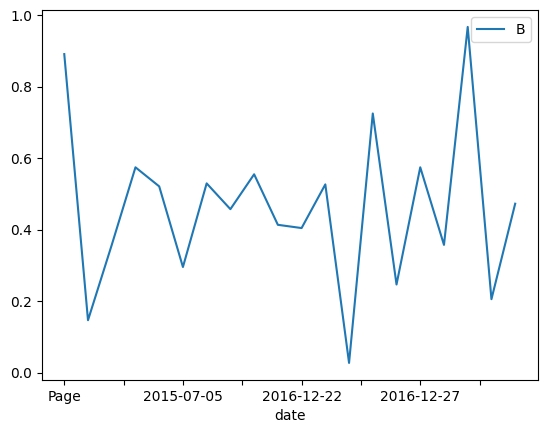

In [41]:
# Assuming you have data for 'B' column
# If not, you need to add this data to your DataFrame first

# Example data for 'B' column
data['B'] = np.random.rand(len(data['date']))
# Replace with your actual data

df = pd.DataFrame(data)

# line plot for page and the object
df.plot(x='date', y='B', kind='line')
plt.show()

In [42]:
# rename cols
df.columns = ['ds', 'y']
df.dtypes

,0
ds,object
y,float64


In [45]:
# pandas by default only sees text (which it calls object) and numbers so we change dtype of ds
# Exclude the first row which contains the string "Page"
df['ds'] = pd.to_datetime(df['ds'][1:]) # Convert to datetime starting from the second row

# Reset index if needed to avoid issues with missing index 0
df = df.reset_index(drop=True)
df.dtypes

,0
ds,datetime64[ns]
y,float64


In [46]:
df.head()

,ds,y
0,NaT,0.891357
1,2015-07-01,0.146828
2,2015-07-02,0.357337
3,2015-07-03,0.574654
4,2015-07-04,0.521298


In [47]:
df.tail()

,ds,y
15,2016-12-27,0.574674
16,2016-12-28,0.357559
17,2016-12-29,0.967449
18,2016-12-30,0.205712
19,2016-12-31,0.472828


In [49]:
#  ML - Create the Prophet Prediction Model
model = Prophet()

In [51]:
# pandas by default only sees text (which it calls object) and numbers so we change dtype of ds
# Exclude the first row which contains the string "Page"
df['ds'] = pd.to_datetime(df['ds'][1:]) # Convert to datetime starting from the second row

# Reset index if needed to avoid issues with missing index 0
df = df.reset_index(drop=True)

# Drop the first row (previously containing "Page", now NaT)
df = df.drop(0, axis=0) # This line was added to remove the first row

# Reset index again to ensure a continuous index
df = df.reset_index(drop=True) # This line was adjusted to reset the index after dropping

df.dtypes

,0
ds,datetime64[ns]
y,float64


In [53]:
df.shape

(19, 2)

In [55]:
# sample = df[-12:]
sample = df.tail(12)
sample

,ds,y
7,2015-07-08,0.555120
8,2015-07-09,0.413768
9,2016-12-22,0.404689
10,2016-12-23,0.526859
11,2016-12-24,0.027331
12,2016-12-25,0.725249
13,2016-12-26,0.246807
14,2016-12-27,0.574674
15,2016-12-28,0.357559
16,2016-12-29,0.967449


In [56]:
sample[['ds']]

,ds
7,2015-07-08
8,2015-07-09
9,2016-12-22
10,2016-12-23
11,2016-12-24
12,2016-12-25
13,2016-12-26
14,2016-12-27
15,2016-12-28
16,2016-12-29


In [59]:
#  ML - Create the Prophet Prediction Model
model = Prophet()

# Fit the model to your data (df)
model.fit(df)  # Add this line to train the model

# Create a DataFrame with predictions from our Prophet model.
forecast = model.predict(sample[['ds']])
forecast.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpng7d8fur/4wmg7cbf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpng7d8fur/lrkgc94z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51061', 'data', 'file=/tmp/tmpng7d8fur/4wmg7cbf.json', 'init=/tmp/tmpng7d8fur/lrkgc94z.json', 'output', 'file=/tmp/tmpng7d8fur/prophet_model51v0dob1/prophet_model-20250114104937.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:49:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:49:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-08,0.425860,0.103439,0.583449,0.425860,0.425860,-0.081649,-0.081649,-0.081649,-0.081649,-0.081649,-0.081649,0.0,0.0,0.0,0.344211
1,2015-07-09,0.425910,0.275836,0.766822,0.425910,0.425910,0.096480,0.096480,0.096480,0.096480,0.096480,0.096480,0.0,0.0,0.0,0.522390
2,2016-12-22,0.452699,0.306680,0.784415,0.452699,0.452699,0.096480,0.096480,0.096480,0.096480,0.096480,0.096480,0.0,0.0,0.0,0.549179
3,2016-12-23,0.452750,0.192531,0.692271,0.452750,0.452750,-0.008108,-0.008108,-0.008108,-0.008108,-0.008108,-0.008108,0.0,0.0,0.0,0.444642
4,2016-12-24,0.452800,0.095397,0.599627,0.452800,0.452800,-0.103410,-0.103410,-0.103410,-0.103410,-0.103410,-0.103410,0.0,0.0,0.0,0.349390


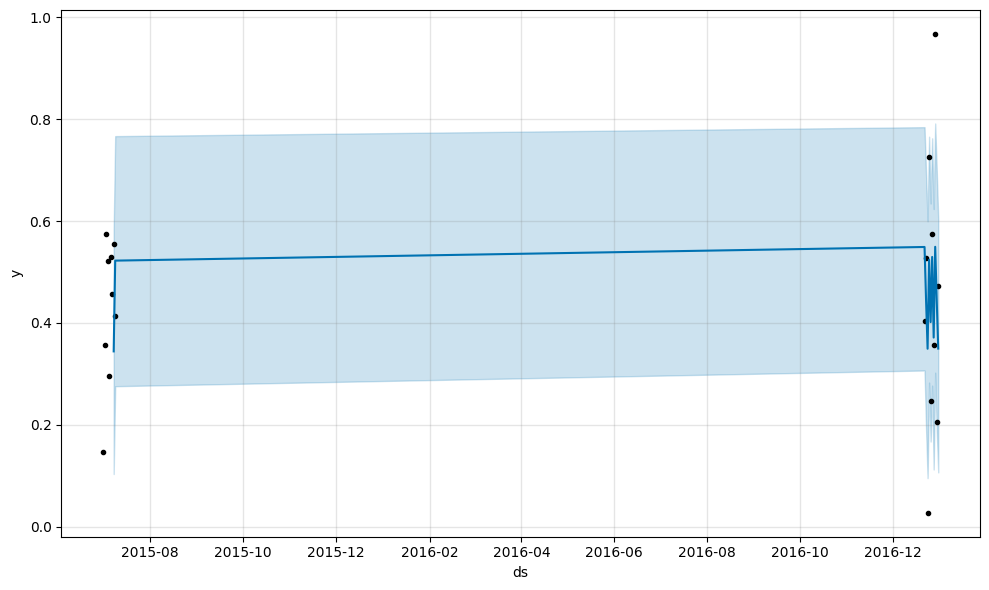

In [63]:
model.plot(forecast);

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


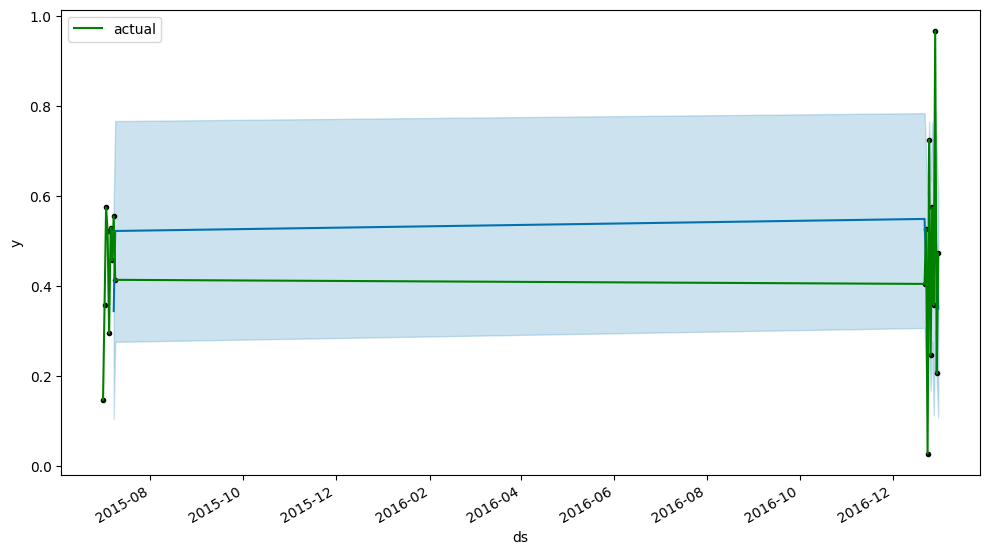

In [65]:
ax = model.plot(forecast).gca()
df.plot(ax=ax, x='ds', y='y', label='actual', color='g');

In [66]:
# Show the errors - the difference between the predicted and actual car sales for the last 12 months.

# Note: Considering our car sales those months are between 15,000 ~ 25,000 cars,
# getting errors <1000 cars for most months is pretty good

difference = abs(forecast['yhat'].values - sample['y'].values) # abs gives us the absolute number
difference


array([0.21090884, 0.10862154, 0.14449019, 0.0822174 , 0.32205897,
       0.2012549 , 0.15496139, 0.04504709, 0.01379337, 0.41791663,
       0.23928261, 0.12308555])

In [67]:
# Luckily prophet comes with some amazing tools for predictions,
# including the make_future_dataframe() method which allows us to quickly
# create a set of future dates to use for prediction. And it automatically turns it into a DataFrame

future = model.make_future_dataframe(freq='MS', periods=24) # append 24 new months to the existing data
future

,ds
0,2015-07-01
1,2015-07-02
2,2015-07-03
3,2015-07-04
4,2015-07-05
5,2015-07-06
6,2015-07-07
7,2015-07-08
8,2015-07-09
9,2016-12-22


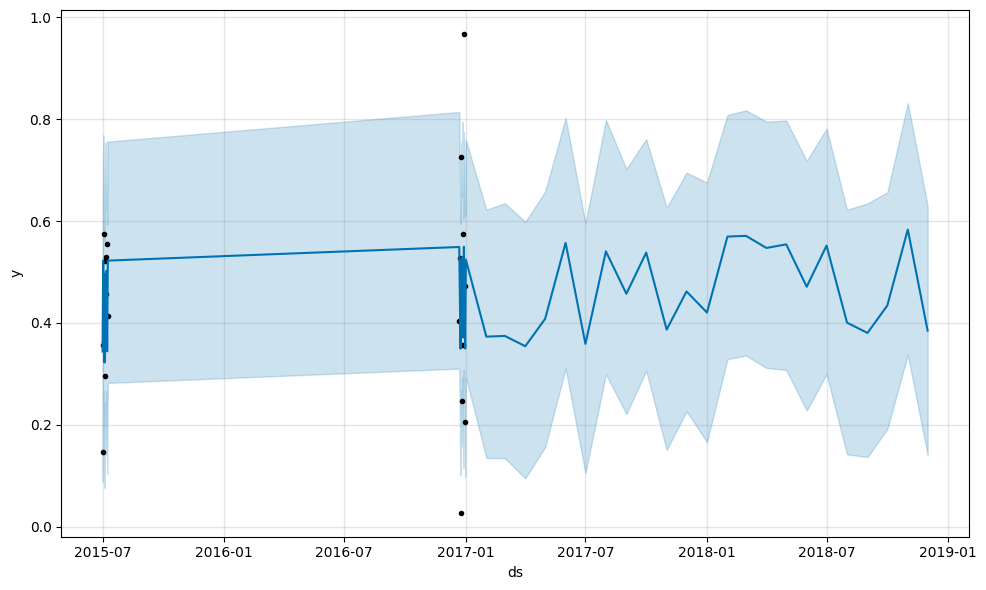

In [68]:
# You can see how the model looks for patterns in historic data, but without overfitting.
# you can see that some black dots are not covered by the blue area. Which is normal, because
# not every month of car sales follows the same pattern, we've all had better and worse months

future_forecast = model.predict(future)
model.plot(future_forecast);

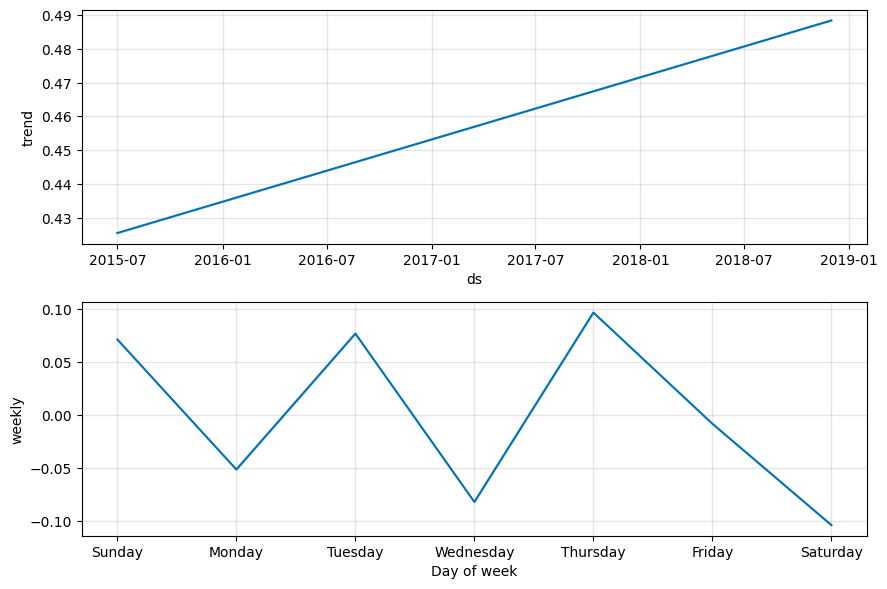

In [69]:
model.plot_components(future_forecast);

In [70]:
from prophet.plot import plot_plotly

plot_plotly(model, future_forecast)